## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 15 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [7]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.99, 0.5, 0.1]
redice_lr_patient = [3,5,10]

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=reduce_patient, 
                              verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["accuracy"],
                             'valid-acc': model.history.history["val_accuracy"]}

Numbers of exp: 0, reduce_factor: 0.99, reduce_patient: 3
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
b

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 2s 32us/step - loss: 2.2315 - accuracy: 0.2695 - val_loss: 2.1741 - val_accuracy: 0.1638
Epoch 2/15
50000/50000 [==============================] - 1s 27us/step - loss: 1.7502 - accuracy: 0.3868 - val_loss: 2.0012 - val_accuracy: 0.2849
Epoch 3/15
50000/50000 [==============================] - 1s 25us/step - loss: 1.6274 - accuracy: 0.4267 - val_loss: 1.8384 - val_accuracy: 0.3449
Epoch 4/15
50000/50000 [==============================] - 1s 27us/step - loss: 1.5546 - accuracy: 0.4526 - val_loss: 1.7201 - val_accuracy: 0.4039
Epoch 5/15
50000/50000 [==============================] - 1s 25us/step - loss: 1.5013 - accuracy: 0.4712 - val_loss: 1.6331 - val_accuracy: 0.4335
Epoch 6/15
50000/50000 [==============================] - 1s 27us/step - loss: 1.4596 - accuracy: 0.4872 - val_loss: 1.5970 - val_accuracy: 0.4396
Epoch 7/15
50000/50000 [==============================] - 1s 27us/st

50000/50000 [==============================] - 1s 26us/step - loss: 1.5170 - accuracy: 0.4706 - val_loss: 1.6395 - val_accuracy: 0.4374
Epoch 6/15
50000/50000 [==============================] - 1s 28us/step - loss: 1.4731 - accuracy: 0.4848 - val_loss: 1.5915 - val_accuracy: 0.4413
Epoch 7/15
50000/50000 [==============================] - 1s 26us/step - loss: 1.4331 - accuracy: 0.4994 - val_loss: 1.5667 - val_accuracy: 0.4537
Epoch 8/15
50000/50000 [==============================] - 1s 26us/step - loss: 1.3992 - accuracy: 0.5098 - val_loss: 1.5310 - val_accuracy: 0.4579
Epoch 9/15
50000/50000 [==============================] - 1s 26us/step - loss: 1.3696 - accuracy: 0.5230 - val_loss: 1.5148 - val_accuracy: 0.4692
Epoch 10/15
50000/50000 [==============================] - 1s 26us/step - loss: 1.3416 - accuracy: 0.5333 - val_loss: 1.5086 - val_accuracy: 0.4640
Epoch 11/15
50000/50000 [==============================] - 1s 26us/step - loss: 1.3167 - accuracy: 0.5409 - val_loss: 1.4921 - v

50000/50000 [==============================] - 1s 28us/step - loss: 1.3501 - accuracy: 0.5307 - val_loss: 1.5095 - val_accuracy: 0.4639
Epoch 11/15
50000/50000 [==============================] - 1s 26us/step - loss: 1.3248 - accuracy: 0.5397 - val_loss: 1.5093 - val_accuracy: 0.4652
Epoch 12/15
50000/50000 [==============================] - 1s 27us/step - loss: 1.3004 - accuracy: 0.5483 - val_loss: 1.4936 - val_accuracy: 0.4712
Epoch 13/15
50000/50000 [==============================] - 1s 27us/step - loss: 1.2786 - accuracy: 0.5575 - val_loss: 1.4949 - val_accuracy: 0.4700
Epoch 14/15
50000/50000 [==============================] - 1s 26us/step - loss: 1.2565 - accuracy: 0.5626 - val_loss: 1.4936 - val_accuracy: 0.4664
Epoch 15/15
50000/50000 [==============================] - 1s 26us/step - loss: 1.2342 - accuracy: 0.5713 - val_loss: 1.4895 - val_accuracy: 0.4723
Numbers of exp: 7, reduce_factor: 0.10, reduce_patient: 5
Model: "model_8"
_________________________________________________

Epoch 15/15
50000/50000 [==============================] - 1s 27us/step - loss: 1.2249 - accuracy: 0.5751 - val_loss: 1.4706 - val_accuracy: 0.4852
Numbers of exp: 9, reduce_factor: 0.99, reduce_patient: 3
Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_28 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_29 (Batc (None, 256)               1024      
__________________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 2s 41us/step - loss: 1.8354 - accuracy: 0.3573 - val_loss: 3.7375 - val_accuracy: 0.2511
Epoch 2/15
50000/50000 [==============================] - 1s 29us/step - loss: 1.5506 - accuracy: 0.4499 - val_loss: 1.8216 - val_accuracy: 0.3678
Epoch 3/15
50000/50000 [==============================] - 1s 28us/step - loss: 1.4487 - accuracy: 0.4824 - val_loss: 1.6893 - val_accuracy: 0.4008
Epoch 4/15
50000/50000 [==============================] - 1s 28us/step - loss: 1.3809 - accuracy: 0.5109 - val_loss: 1.5534 - val_accuracy: 0.4381
Epoch 5/15
50000/50000 [==============================] - 1s 30us/step - loss: 1.3201 - accuracy: 0.5308 - val_loss: 1.4780 - val_accuracy: 0.4694
Epoch 6/15
50000/50000 [==============================] - 1s 29us/step - loss: 1.2694 - accuracy: 0.5497 - val_loss: 1.5388 - val_accuracy: 0.4478
Epoch 7/15
50000/50000 [==============================] - 1s 27us/st

50000/50000 [==============================] - 1s 27us/step - loss: 1.2669 - accuracy: 0.5525 - val_loss: 1.5435 - val_accuracy: 0.4631
Epoch 6/15
50000/50000 [==============================] - 1s 29us/step - loss: 1.2125 - accuracy: 0.5737 - val_loss: 1.4410 - val_accuracy: 0.4851
Epoch 7/15
50000/50000 [==============================] - 1s 29us/step - loss: 1.1644 - accuracy: 0.5890 - val_loss: 1.4565 - val_accuracy: 0.4684
Epoch 8/15
50000/50000 [==============================] - 1s 27us/step - loss: 1.1204 - accuracy: 0.6049 - val_loss: 1.5777 - val_accuracy: 0.4455
Epoch 9/15
50000/50000 [==============================] - 1s 27us/step - loss: 1.0743 - accuracy: 0.6200 - val_loss: 1.4861 - val_accuracy: 0.4653
Epoch 10/15
50000/50000 [==============================] - 1s 27us/step - loss: 1.0351 - accuracy: 0.6347 - val_loss: 1.5133 - val_accuracy: 0.4733
Epoch 11/15
50000/50000 [==============================] - 1s 29us/step - loss: 0.9958 - accuracy: 0.6523 - val_loss: 1.4394 - v

Epoch 10/15
50000/50000 [==============================] - 1s 27us/step - loss: 1.0442 - accuracy: 0.6331 - val_loss: 1.5377 - val_accuracy: 0.4642
Epoch 11/15
50000/50000 [==============================] - 1s 27us/step - loss: 1.0056 - accuracy: 0.6486 - val_loss: 1.4621 - val_accuracy: 0.4851

Epoch 00011: ReduceLROnPlateau reducing learning rate to 4.80298069305718e-05.
Epoch 12/15
50000/50000 [==============================] - 1s 27us/step - loss: 0.9155 - accuracy: 0.6857 - val_loss: 1.3367 - val_accuracy: 0.5254
Epoch 13/15
50000/50000 [==============================] - 1s 30us/step - loss: 0.8890 - accuracy: 0.6979 - val_loss: 1.3193 - val_accuracy: 0.5354
Epoch 14/15
50000/50000 [==============================] - 1s 29us/step - loss: 0.8787 - accuracy: 0.7015 - val_loss: 1.3091 - val_accuracy: 0.5391
Epoch 15/15
50000/50000 [==============================] - 1s 28us/step - loss: 0.8719 - accuracy: 0.7026 - val_loss: 1.3099 - val_accuracy: 0.5416
Numbers of exp: 16, reduce_facto

50000/50000 [==============================] - 1s 29us/step - loss: 1.1189 - accuracy: 0.6134 - val_loss: 1.4380 - val_accuracy: 0.5002
Epoch 15/15
50000/50000 [==============================] - 1s 30us/step - loss: 1.0985 - accuracy: 0.6225 - val_loss: 1.4430 - val_accuracy: 0.4982
Numbers of exp: 18, reduce_factor: 0.99, reduce_patient: 3
Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_55 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_____________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 2s 50us/step - loss: 1.8403 - accuracy: 0.3647 - val_loss: 2.3214 - val_accuracy: 0.2140
Epoch 2/15
50000/50000 [==============================] - 1s 27us/step - loss: 1.5330 - accuracy: 0.4575 - val_loss: 1.8011 - val_accuracy: 0.3448
Epoch 3/15
50000/50000 [==============================] - 1s 29us/step - loss: 1.4249 - accuracy: 0.4972 - val_loss: 1.9610 - val_accuracy: 0.3393
Epoch 4/15
50000/50000 [==============================] - 1s 27us/step - loss: 1.3458 - accuracy: 0.5249 - val_loss: 1.8637 - val_accuracy: 0.3729
Epoch 5/15
50000/50000 [==============================] - 1s 27us/step - loss: 1.2731 - accuracy: 0.5512 - val_loss: 2.3299 - val_accuracy: 0.2714
Epoch 6/15
50000/50000 [==============================] - 1s 27us/step - loss: 1.2195 - accuracy: 0.5698 - val_loss: 1.6024 - val_accuracy: 0.4360
Epoch 7/15
50000/50000 [==============================] - 1s 29us/st

50000/50000 [==============================] - 1s 29us/step - loss: 1.3664 - accuracy: 0.5198 - val_loss: 1.8762 - val_accuracy: 0.3293
Epoch 5/15
50000/50000 [==============================] - 1s 27us/step - loss: 1.3049 - accuracy: 0.5447 - val_loss: 1.6550 - val_accuracy: 0.4043
Epoch 6/15
50000/50000 [==============================] - 1s 28us/step - loss: 1.2477 - accuracy: 0.5638 - val_loss: 1.6163 - val_accuracy: 0.4224
Epoch 7/15
50000/50000 [==============================] - 1s 27us/step - loss: 1.2017 - accuracy: 0.5817 - val_loss: 1.7033 - val_accuracy: 0.4076
Epoch 8/15
50000/50000 [==============================] - 1s 27us/step - loss: 1.1627 - accuracy: 0.5945 - val_loss: 1.7194 - val_accuracy: 0.4120
Epoch 9/15
50000/50000 [==============================] - 1s 29us/step - loss: 1.1200 - accuracy: 0.6129 - val_loss: 1.6993 - val_accuracy: 0.4324
Epoch 10/15
50000/50000 [==============================] - 1s 27us/step - loss: 1.0839 - accuracy: 0.6231 - val_loss: 1.6439 - va

50000/50000 [==============================] - 1s 29us/step - loss: 1.2583 - accuracy: 0.5602 - val_loss: 1.5705 - val_accuracy: 0.4414
Epoch 9/15
50000/50000 [==============================] - 1s 27us/step - loss: 1.2217 - accuracy: 0.5746 - val_loss: 1.5682 - val_accuracy: 0.4464
Epoch 10/15
50000/50000 [==============================] - 1s 29us/step - loss: 1.1873 - accuracy: 0.5865 - val_loss: 1.5127 - val_accuracy: 0.4658
Epoch 11/15
50000/50000 [==============================] - 1s 30us/step - loss: 1.1575 - accuracy: 0.5981 - val_loss: 1.5294 - val_accuracy: 0.4688
Epoch 12/15
50000/50000 [==============================] - 1s 27us/step - loss: 1.1275 - accuracy: 0.6098 - val_loss: 1.4883 - val_accuracy: 0.4829
Epoch 13/15
50000/50000 [==============================] - 1s 27us/step - loss: 1.1001 - accuracy: 0.6194 - val_loss: 1.5027 - val_accuracy: 0.4783
Epoch 14/15
50000/50000 [==============================] - 1s 30us/step - loss: 1.0717 - accuracy: 0.6329 - val_loss: 1.5307 

50000/50000 [==============================] - 1s 28us/step - loss: 1.6435 - accuracy: 0.4291 - val_loss: 1.7199 - val_accuracy: 0.4061
Epoch 13/15
50000/50000 [==============================] - 1s 27us/step - loss: 1.6223 - accuracy: 0.4370 - val_loss: 1.7113 - val_accuracy: 0.4077
Epoch 14/15
50000/50000 [==============================] - 1s 30us/step - loss: 1.6016 - accuracy: 0.4442 - val_loss: 1.7011 - val_accuracy: 0.4125
Epoch 15/15
50000/50000 [==============================] - 1s 30us/step - loss: 1.5853 - accuracy: 0.4500 - val_loss: 1.6881 - val_accuracy: 0.4208


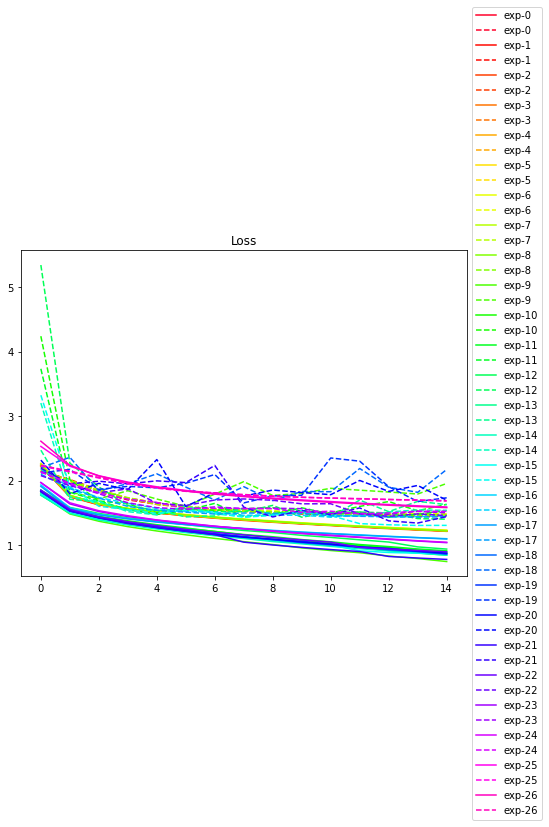

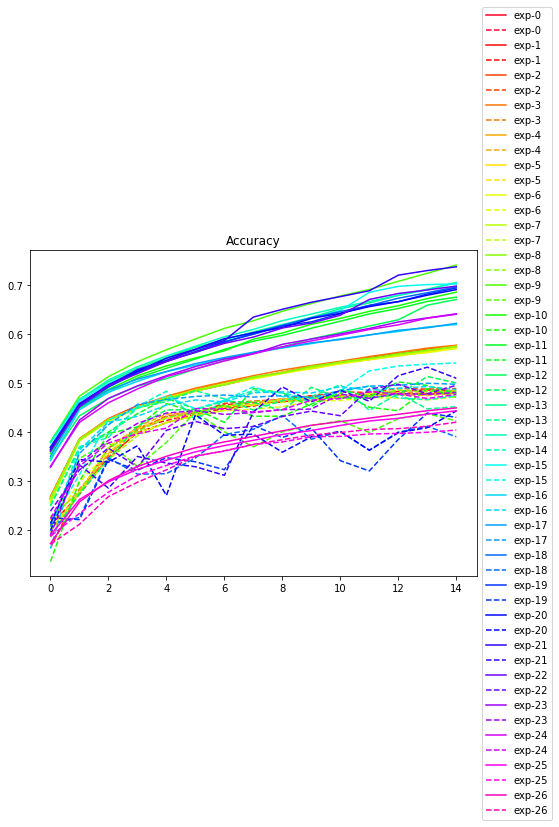

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()